In [14]:
def check_df(dataframe):
  print("################### Shape ##################")
  print(dataframe.shape)
  print("################### Types ##################")
  print(dataframe.info())
  print("################### Head ##################")
  print(dataframe.head())
  print("################### Tail ##################")
  print(dataframe.tail())
  print("################### NA ##################")
  print(dataframe.isnull().sum())
  print("################### Quantiles ##################")
  print(dataframe.describe([0, 0.25, 0.50, 0.75, 0.99, 1]).T)

check_df(df)

################### Shape ##################
(2111, 17)
################### Types ##################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 n

In [15]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
  cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
  num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                 dataframe[col].dtypes != "O"]
  cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                 dataframe[col].dtypes == "O"]

  cat_cols = cat_cols + num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O" ]
  num_cols = [col for col in num_cols if col not in num_but_cat]

  print(f"Observations: {dataframe.shape[0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f'cat_cols: {len(cat_cols)}')
  print(f'num_cols: {len(num_cols)}')
  print(f'cat_but_car: {len(cat_but_car)}')
  print(f'num_but_cat: {len(num_but_cat)}')
  return cat_cols, num_cols,num_but_cat

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 2111
Variables: 17
cat_cols: 9
num_cols: 8
cat_but_car: 0
num_but_cat: 0


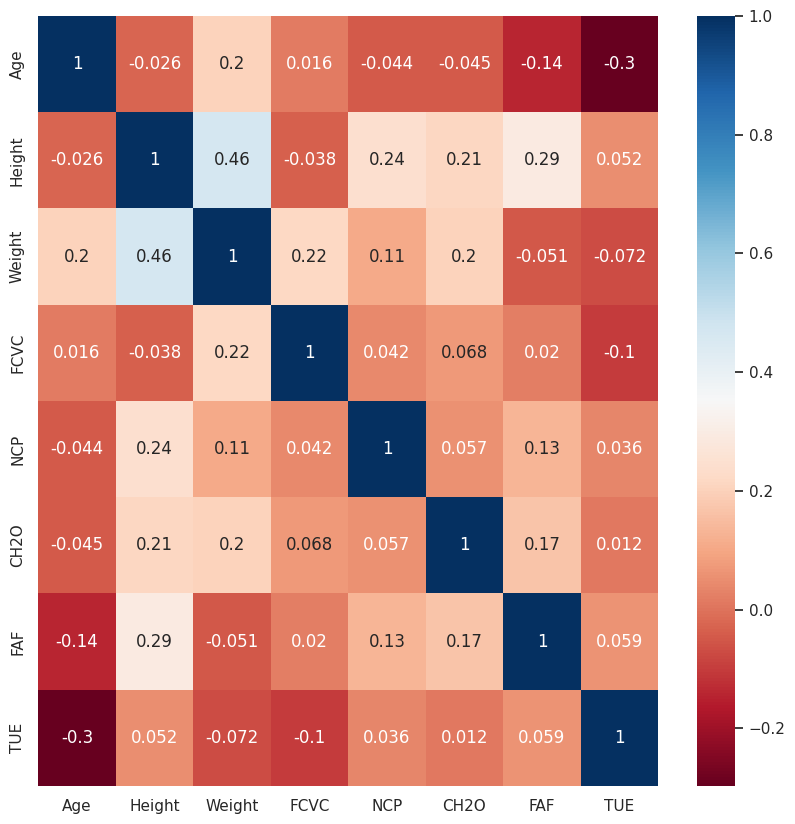

In [16]:
corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (10,10)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

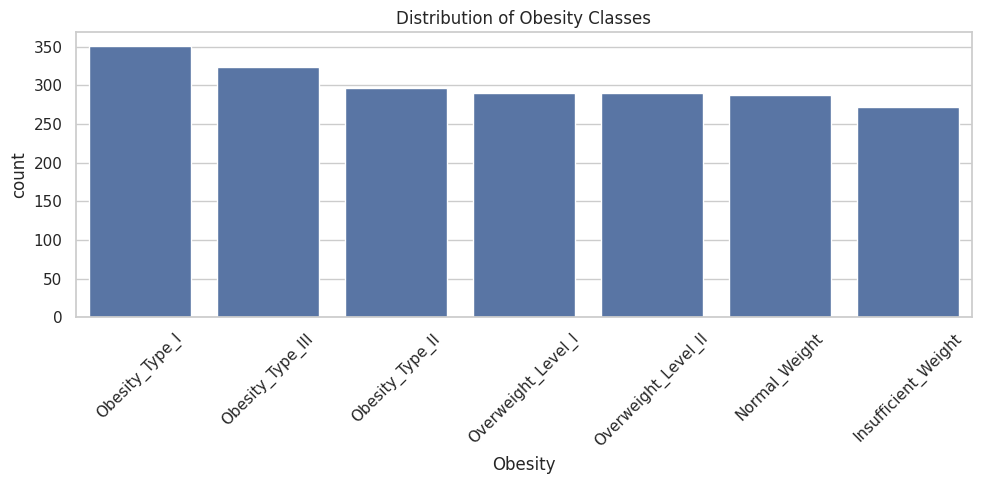

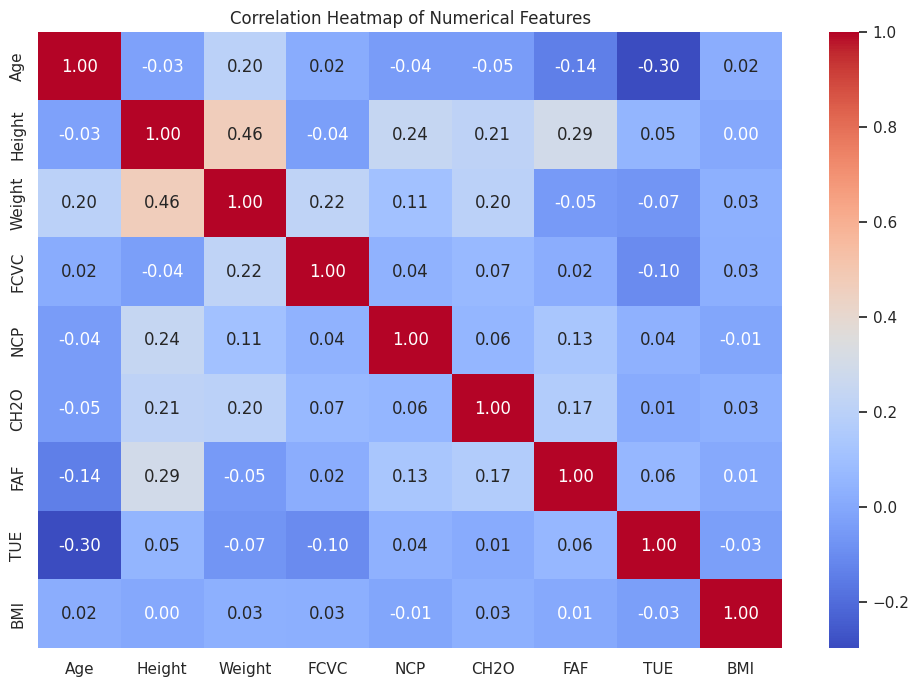

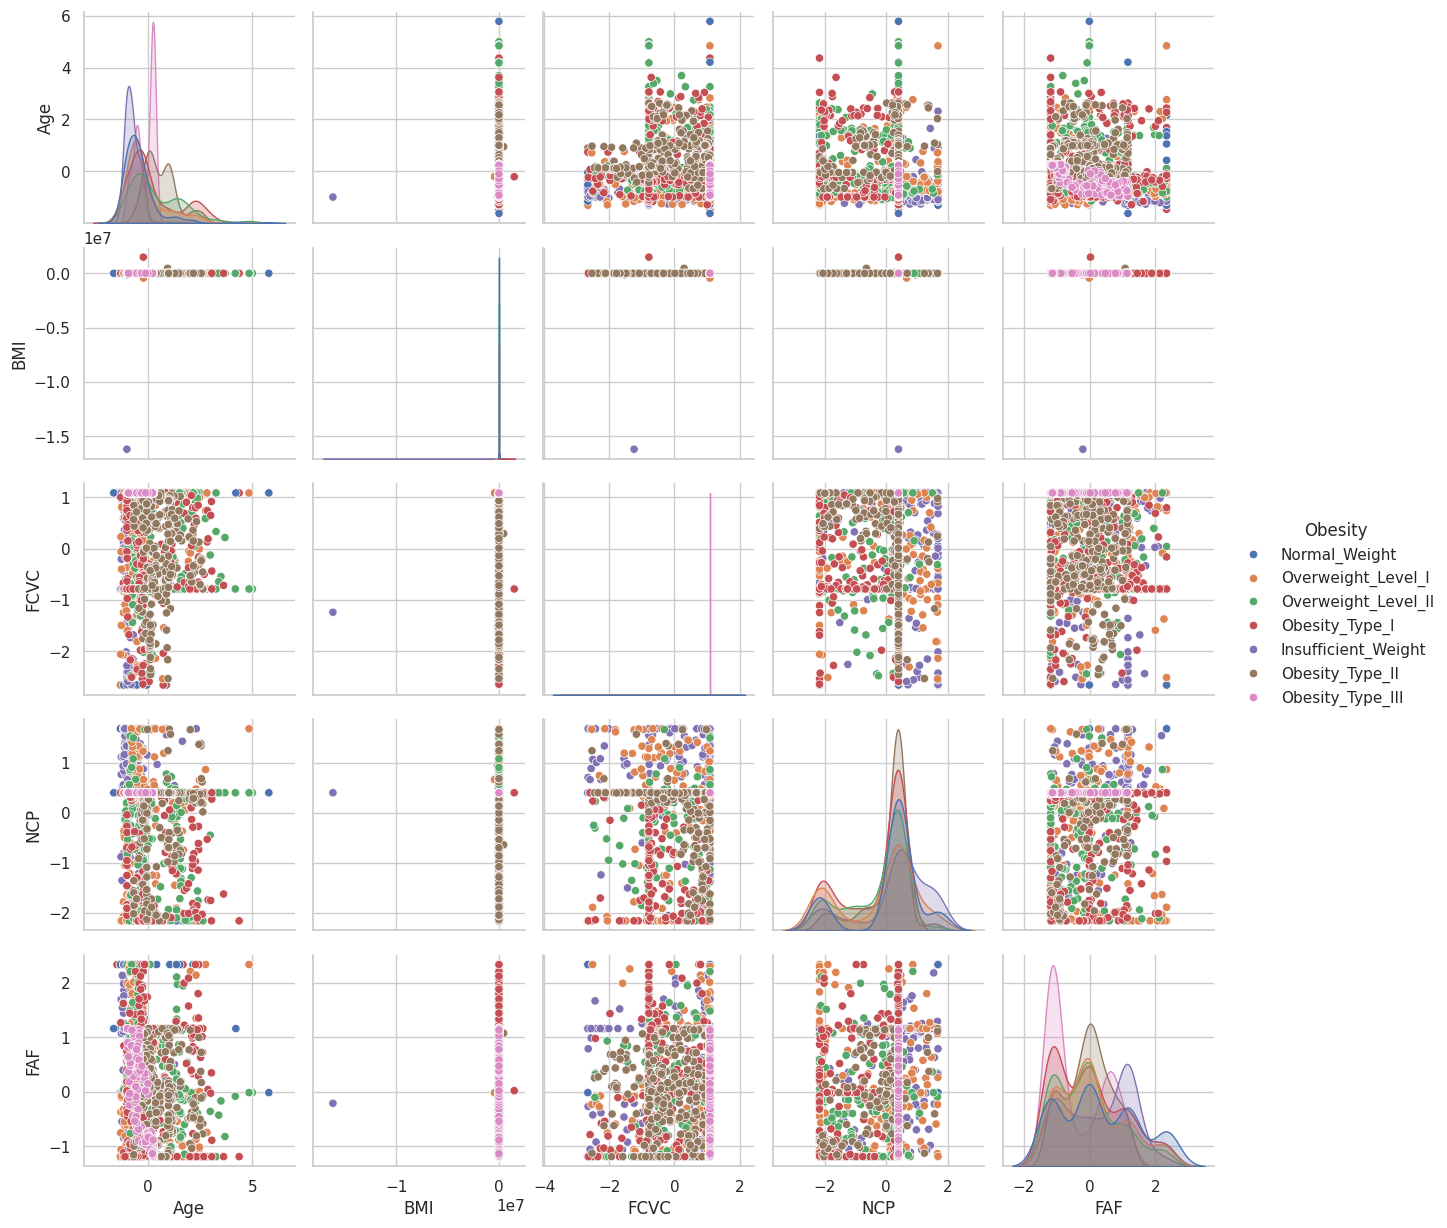

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate BMI and add as a new feature
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Visualizations setup
sns.set(style="whitegrid")

# Class distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Obesity', order=df['Obesity'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Obesity Classes')
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
numerical_features = df.select_dtypes(include=['float64']).copy()
corr = numerical_features.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# Pairplot of selected features by Obesity class
selected_features = ['Age', 'BMI', 'FCVC', 'NCP', 'FAF']
sns.pairplot(df[selected_features + ['Obesity']], hue='Obesity', diag_kind='kde')
plt.show()


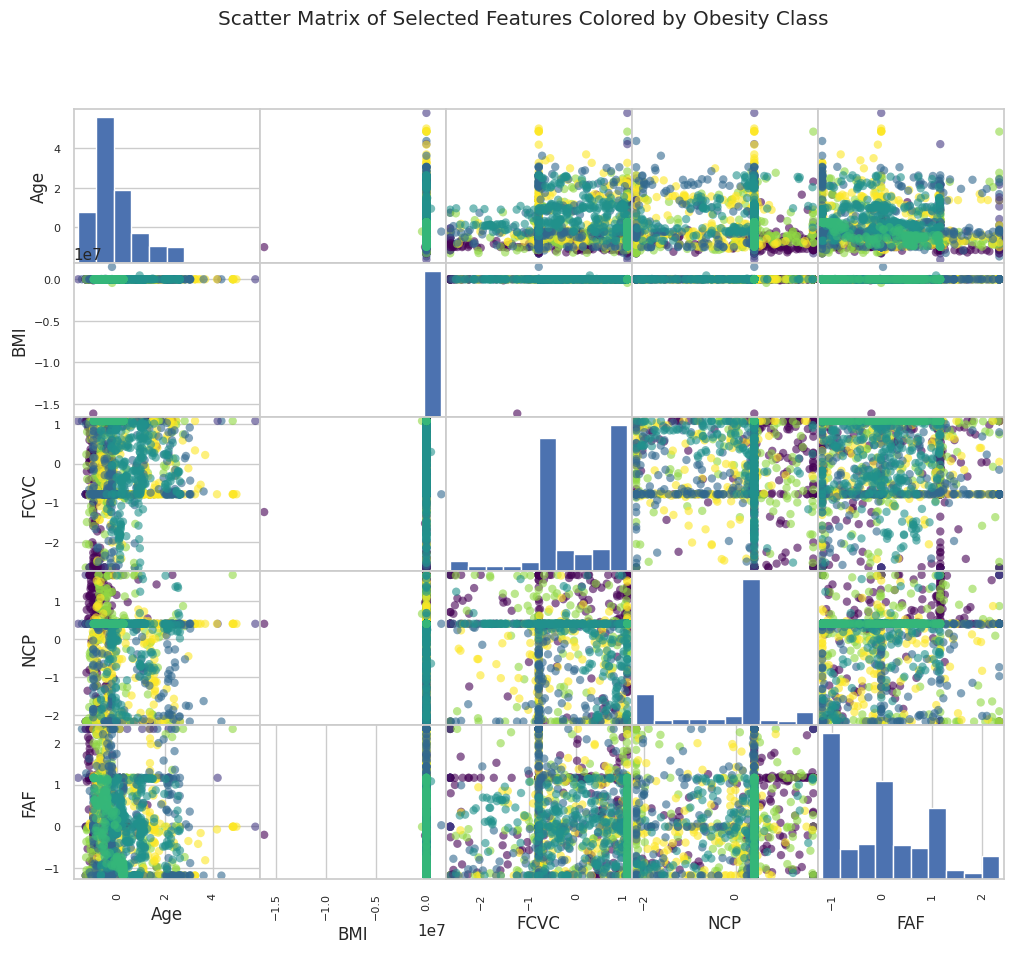

In [21]:
from pandas.plotting import scatter_matrix

# Drop rows with missing or non-numeric values in selected columns
clean_df = df[selected_features + ['Obesity']].copy()
clean_df = clean_df.dropna()

# Ensure numeric types for features
for col in selected_features:
    clean_df[col] = pd.to_numeric(clean_df[col], errors='coerce')

# Drop rows with any remaining NaNs after conversion
clean_df = clean_df.dropna()

# Encode Obesity as categorical codes for plotting
clean_df['Obesity_Code'] = clean_df['Obesity'].astype('category').cat.codes

# Plot scatter matrix
scatter_matrix(clean_df[selected_features], figsize=(12, 10), diagonal='hist', c=clean_df['Obesity_Code'], alpha=0.6, marker='o', cmap='viridis')
plt.suptitle("Scatter Matrix of Selected Features Colored by Obesity Class")
plt.show()

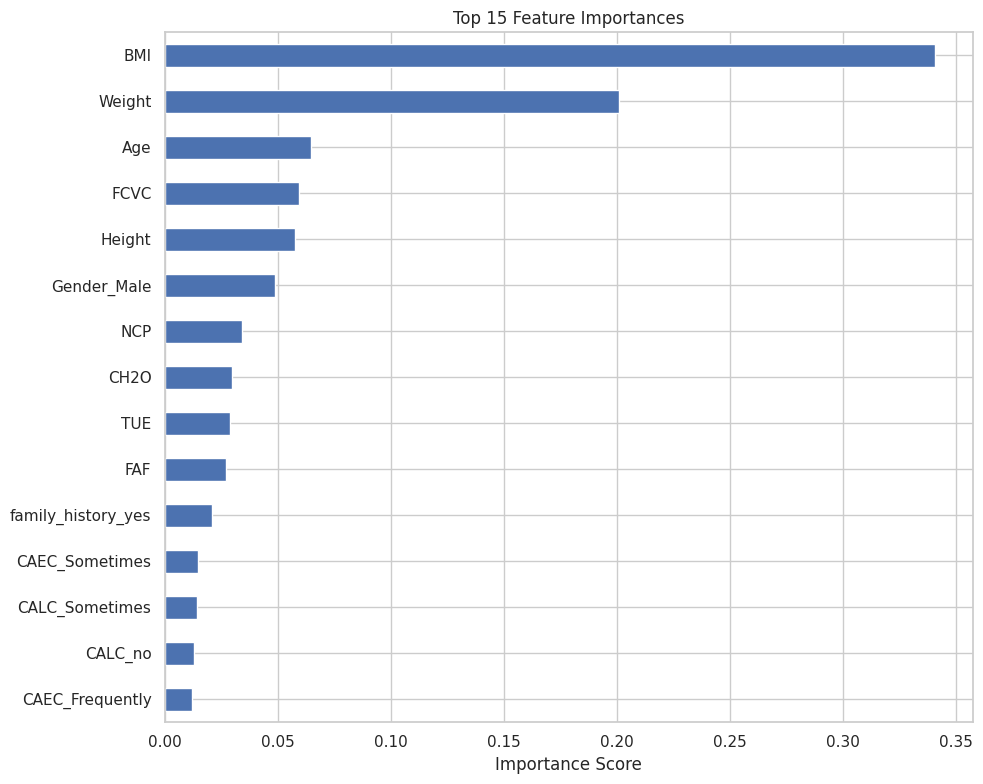

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("Obesity prediction.csv")

# Feature engineering: Add BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Label encode target variable
label_encoder = LabelEncoder()
df['Obesity'] = label_encoder.fit_transform(df['Obesity'])

# Encode categorical features
df_encoded = pd.get_dummies(df.drop(columns=['Obesity']), drop_first=True)

# Align features and labels
X = df_encoded
y = df['Obesity']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Plot feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(15).sort_values().plot(kind='barh', figsize=(10, 8), title="Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['Gender', 'family_history', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC',\n       'MTRANS'],\n      dtype='object')] are in the [columns]"

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Obesity,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,Normal_Weight,False,...,False,False,False,False,False,True,False,False,True,False
1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,Normal_Weight,False,...,False,True,True,False,True,False,False,False,True,False
2,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,Normal_Weight,True,...,False,False,False,True,False,False,False,False,True,False
3,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,Overweight_Level_I,True,...,False,False,False,True,False,False,False,False,False,True
4,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,Overweight_Level_II,True,...,False,False,False,False,True,False,False,False,True,False
